## West Nile Virus (WNV) Public Health Analysis Project 1

### Part 1: Data Cleaning and EDA

##### Preliminaries: <span style="font-size:14px; font-weight:normal;">Importing libraries and data, peaking at the data, and cleaning up column names </span>

In [1]:
# Importing all required libraries: 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
# Importing the data and creating new dataframe: 

df=pd.read_csv('C:/Users/simon/Downloads/mosquito_data.csv')

In [3]:
# Looking at the first 5 entries:

df.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [4]:
# Looking at the last 5 entries:

df.tail()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
18490,2016,36,3XX W 18TH ST,3,T043,GRAVID,2016-09-09 00:09:00,4,Pip,positive,CULEX PIPIENS,41.857843,-87.635858
18491,2007,34,46XX N MILWAUKEE AVE,46,T003,GRAVID,2007-08-24 00:08:00,19,Pip,positive,CULEX PIPIENS,41.965376,-87.758403
18492,2016,30,127XX S DOTY AVE,127,T115,GRAVID,2016-07-27 00:07:00,34,Res,positive,CULEX RESTUANS,41.662395,-87.590176
18493,2017,33,20XX N DOMINICK ST,20,T240B,SENTINEL,2017-08-17 00:08:00,50,Res,positive,CULEX RESTUANS,41.919197,-87.664758
18494,2015,33,100XX W OHARE AIRPORT,100,T902,GRAVID,2015-08-20 00:08:00,6,Res,positive,CULEX RESTUANS,NaN,NaN


In [5]:
# Checking which data types and how many null values are stored: 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


In [6]:
# Getting some descriptive statistics:

df.describe()

,Year,Week,Block,Mosquito number,Lat,Lon
count,18495.000000,18495.000000,18495.000000,18495.000000,15571.000000,15571.000000
mean,2012.905812,31.004001,54.314788,10.879913,41.839963,-87.691642
std,3.725857,4.332020,36.712796,13.475066,0.111374,0.076545
min,2007.000000,20.000000,1.000000,1.000000,41.644720,-87.854473
25%,2010.000000,28.000000,22.000000,2.000000,41.742670,-87.747459
50%,2013.000000,31.000000,51.000000,5.000000,41.845715,-87.691698
75%,2016.000000,34.000000,89.000000,14.000000,41.945961,-87.637873
max,2019.000000,40.000000,132.000000,50.000000,42.017801,-87.531051


We are now going to convert all the capital letters to lower letters and remove the white spaces in the column names. This will make our dataframe more accessible and a little less complicated for coding purposes. For clarity reasons, we are also going to rename the column *mosquito_number* to *mosquito_count*.  

In [7]:
# Renaming the 'Mosquito number' column:

df.rename(columns={'Mosquito number': 'Mosquito count'}, inplace=True)

In [8]:
# Eliminating capital letters and white space in column names:

df.columns=df.columns.str.strip().str.lower().str.replace(' ', '_', regex=False).str.replace('(', '', regex=False).str.replace(')', '', regex=False)

In [9]:
# Checking to see that it was done correctly:

df.head(1)

,year,week,address_block,block,trap,trap_type,date,mosquito_count,mosquito_id,wnv_present,species,lat,lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN


### Part 1 - Basic Data Wrangling

#### Question 1:<span style="font-size:14px; font-weight:normal;"> ***Dataframe Shape*** </span> 

In [10]:
# Getting the dataframe shape:

df.shape

(18495, 13)

The dataframe has 18,495 rows and 13 columns. The shape of the dataframe is 18,495 x 13.


#### Question 2: <span style="font-size:14px; font-weight:normal;"> ***Converting the date Column to a Datetime Format*** </span> 

In [11]:
# Converting the 'Date' column to a datetime format:

df['date']=df['date'].astype('datetime64[ns]')

In [12]:
# Checking to see that our conversion was done correctly:

df['date'].dtypes 

dtype('<M8[ns]')

*Note*: For this machine, data type *M8[ns]* is equivalent to *datetime64[ns]*.

#### Question 3: <span style="font-size:14px; font-weight:normal;">***Examining Numerical and Categorical Columns' Data Types and Distributions*** </span> 

Let us determine which columns are categorical and with columns are numerical. We will then choose two columns from each group.

In [13]:
# Setting up to make our lists::

categorical_columns=df.select_dtypes('object').columns
numerical_columns=df.select_dtypes(exclude='object').columns

In [14]:
# Listing categorical columns:

list(categorical_columns)

['address_block', 'trap', 'trap_type', 'mosquito_id', 'wnv_present', 'species']

In [15]:
# Listing numerical columns:

list(numerical_columns)

['year', 'week', 'block', 'date', 'mosquito_count', 'lat', 'lon']

##### a) The 'wnv_ present' column

The first categorical column we will use is the *wnv_present* column.

In [16]:
# Looking at the unique values and data types in the 'wnv_present' column:

df['wnv_present'].unique()

array(['negative', 'positive'], dtype=object)

In [17]:
# Calculating the count of each unique value:

df['wnv_present'].value_counts()

negative    14501
positive     3994
Name: wnv_present, dtype: int64

In [18]:
# Alternatively, calculating the proportion of negative and positive values:

df['wnv_present'].value_counts(normalize=True)

negative    0.78405
positive    0.21595
Name: wnv_present, dtype: float64

As an add on, we can present a visual displaying the percetange of positive WNV test versus negative WNV test.

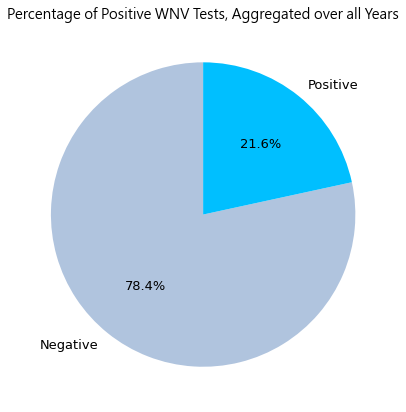

In [19]:
# Counting the occurrences of each test result:
result_counts=df['wnv_present'].value_counts()

# Plotting the pie chart:
plt.figure(figsize=(7, 7))

#Creating the labels and colours:
plt.pie(result_counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=90, colors=['lightsteelblue', 'deepskyblue'],textprops={'fontsize': 13})

#Adding the title and fonts:
plt.title('Percentage of Positive WNV Tests, Aggregated over all Years', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 14})

plt.show()

The second categorical column we will use is the *species* column.

In [20]:
# Looking at the unique values and data types in the 'species' column:

df['species'].unique()

array(['CULEX RESTUANS', 'CULEX TERRITANS', 'CULEX SALINARIUS',
       'CULEX PIPIENS'], dtype=object)

In [21]:
# Counting each of the unique values:

df['species'].value_counts()

CULEX RESTUANS      11866
CULEX PIPIENS        5486
CULEX TERRITANS       917
CULEX SALINARIUS      226
Name: species, dtype: int64

In [22]:
# Calculating the frequencies, in percentages, for each species:

species_counts = df['species'].value_counts()
percentage_distribution = species_counts / len(df) * 100

print(percentage_distribution)

CULEX RESTUANS      64.157881
CULEX PIPIENS       29.662071
CULEX TERRITANS      4.958097
CULEX SALINARIUS     1.221952
Name: species, dtype: float64


As an add on, we can make a bar chart to visualize the distribution (in percentages) of the mosquito species .

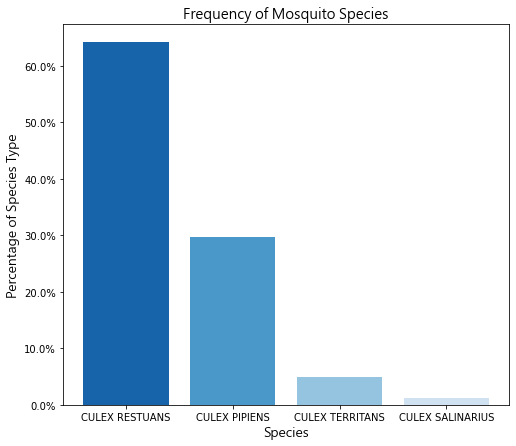

In [23]:
# Creating a function to format y-axis labels as percentages:
def percentage_formatter(x, pos):
    return f'{x:.1f}%'

species_counts = df['species'].value_counts()

# Calculating the percentage distribution:
percentage_distribution = species_counts / len(df) * 100

# Creating a color gradient of different shades of blue:
num_shades = len(species_counts)
blue_gradient = plt.cm.Blues(np.linspace(0.8, 0.2, num_shades))

# Plotting the bar chart:
plt.figure(figsize=(8, 7))
plt.bar(percentage_distribution.index, percentage_distribution, color=blue_gradient)

# Adding labels and titles:
plt.xlabel('Species', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 13})
plt.ylabel('Percentage of Species Type', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 13})
plt.title('Frequency of Mosquito Species', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 14})

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.show()

***Observations***:

* The data type that the *species* column stores is an *object*. 
</br>

* The *species* column indicates the four type of mosquito species in this dataset:
    
        ~ Culex Restuans
        ~ Culex Territans
        ~ Culex Salinarius
        ~ Culex Pipiens

* Since the *species* column has four possible outcomes, the data has a Multinomial Distribution.
</br>

* Approximately 65% of all captured mosquitos were of the *Culex Restuans* species. 

##### c) The 'mosquito_count' numerical column

The first numerical column we will use is the *mosquito_count* column.

In [24]:
# Looking at the unique values in the 'mosquito_count' column:

sort=sorted(df['mosquito_count'].unique())
print(sort)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [25]:
# Checking the data types stored in the 'mosquito_count' column:

df['mosquito_count'].dtypes

dtype('int64')

We will get a better idea of the distribution once we plot a histogram below showing the frequency of the various mosquito numbers.

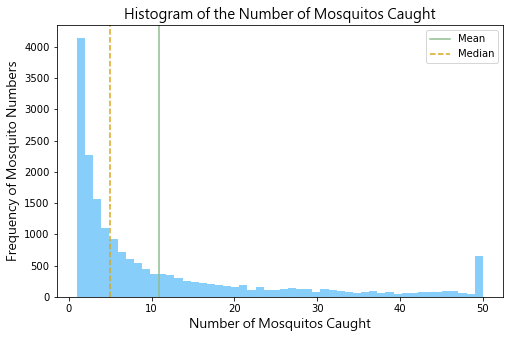

In [26]:
# Plotting the histogram: 
plt.figure(figsize=(8, 5))

# Creating the bins:
plt.hist(df['mosquito_count'], bins=50, color=['lightskyblue'])

# Calculating the mean and mode:
mean=df['mosquito_count'].mean()
median=df['mosquito_count'].median()

# Plotting the mean and mode:
plt.axvline(mean, color='darkseagreen', linestyle='-')
plt.axvline(median, color='goldenrod', linestyle='--')

# Adding the legend, labels and titles:
plt.legend({'Mean':mean,'Median':median})
plt.ylabel('Frequency of Mosquito Numbers', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 13})
plt.xlabel ('Number of Mosquitos Caught', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 13})
plt.title('Histogram of the Number of Mosquitos Caught', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 14})

# Removing the grid:
plt.grid(False)

plt.show()

***Observations***: 

* The data that the *mosquito_count* column stores is *int64*.
</br>

* The *mosquito_count* counts the number of mosquitos caught in the trap. It should be noted that the maximum number of mosquitos recorded per each column entry is 50. Any number above 50 is broken into another row and column entry.
</b>

* Based on the histogram, the distribution is greatly skewed to the right. Indeed, note that the mean is much larger than the median.
</b>


* There is a large outlier at the 50 bin mark.
</b>


* The shape of the distribution, and the outlier, can be explained: we know that once the number of mosquitos exceeds 50, any remaining numbers will be put in a new row. For example, if we count 59 mosquitos in a particular trap, then 50 mosquitos are allocated to one row and the remaining 9 will be allocated to a new row. This splitting of values explains why there is a very high frequency in the 1-3 mosquito bins and the 50 bin. 
</b>


##### d) The 'block' numerical column

The second numerical column we will use is the *block* column.

In [27]:
# Looking at the unique values in the 'block' column:

sort_=sorted(df['block'].unique())
print(sort_)

[1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21, 22, 24, 25, 27, 28, 29, 30, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 75, 77, 79, 80, 81, 82, 88, 89, 91, 93, 96, 98, 100, 101, 104, 105, 109, 111, 112, 115, 119, 122, 127, 129, 131, 132]


In [28]:
# Checking the data types stored in the 'block' column:

df['block'].dtypes

dtype('int64')

We will get a better idea of the distribution once we plot a histogram showing the frequency of the blocks. 

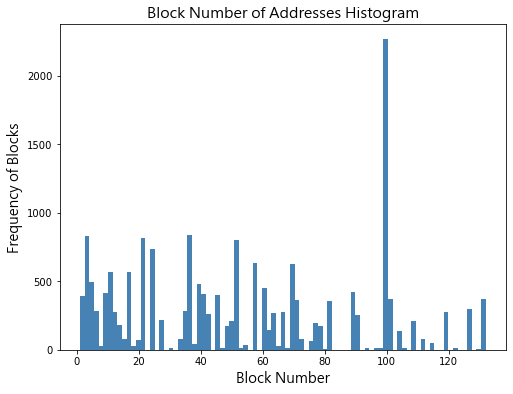

In [29]:
# Plotting the histogram:
plt.figure(figsize=(8, 6))

# Creating the bins:
plt.hist(df['block'], bins=87, color = ['steelblue'])

# Adding labels and titles:
plt.ylabel('Frequency of Blocks', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 14})
plt.xlabel ('Block Number', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 14})
plt.title('Block Number of Addresses Histogram', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 15})

plt.show() 

***Observations***:

* The data type that the *block* column stores is **int64**. 
</b>


* The type of data that the *block* column stores is the block number of an address.
</b>


* The histogram indicates that there is no real distribution.
</b>


* However, we can see that the most frequently used addresses are those with block number 100.

#### Question 4: <span style="font-size:14px; font-weight:normal;"> ***Duplicate Information, Dropping Redundant Columns and Adding a month Column*** </span>

###### Dropping the mosquito_id Column

By inspection, it would appear that the *mosquito_id* and *species* columns are duplicates. Although *mosquito_id* has shorter, and perhaps cleaner, entries because the species are abbreviated, it is still better to use the *species* column to represent the species since the species names are more detailed and accuarate. 
</b>

However, before we drop the *mosquito_id* column, we need to verify that both columns are aligned and match in numbers. 

In [30]:
# Grouping the two columns and counting the matches:

df.groupby(['mosquito_id', 'species']).size()

mosquito_id  species         
Pip          CULEX PIPIENS        5486
Res          CULEX RESTUANS      11866
Sal          CULEX SALINARIUS      226
Ter          CULEX TERRITANS       917
dtype: int64

Since the *mosquito_id* and *species* columns contain identical information, we can go ahead and drop the *mosquito_id* column. 

In [31]:
df.drop(columns='mosquito_id', inplace=True)

##### Decision not to drop the block column

By inspection, it appears that the *address_block* and *block* columns have duplicate information when it comes to specifing the block number. That is, *address_block* contains all the information that the *block* column has. However, the *block* column is numerical and the *address_block* is categorical. 
</b>

The *block* column can be easier to work with because it only contains integers and we can still get information about the approximate area where the traps and mosquitos were located. For example, even though there are some address blocks that have the same block number but different addresses, the latitude and longitude coordinates indicate that those addresses are in very close proximity.  
</b>

For these reasons, we have decided to keep the both the *address_block* and *block* columns. 

##### Decision not to drop the *year* and *week* columns

Intuitively, the *date* column contains all the information from both the *year* and *week* columns. That is, both *year* and *week* are contained within the *date* column. However, both *year* and *week* are numerical columns that are easier to work with than having to extract them each time from *date*, which is a categorical variable. Since we will be using *year* and *week* individually in our analysis, it is best to keep them in the dataset. 

##### Adding a month column

As pointed out above, even though the *date* column contains the same information as the *year* and *week* columns, we kept the *year* and *week* columns to have cleaner codes. For our exploratory data analysis, we will also want to use the months. In this case, we will create a new column *month* in our data set.

In [32]:
# Extracting the month from the date and adding a new column:

df['month']=df['date'].dt.month

In [33]:
# Moving the 'month' column from the last position to the second position:

df=df[['year', 'month', 'week', 'date', 'address_block', 'block', 'trap_type', 'trap', 'mosquito_count', 'species', 'wnv_present', 'lat', 'lon']]

#### Question 5: <span style="font-size:14px; font-weight:normal;"> ***Dealing with Null Values***</span>

##### Finding Null (Missing) Values

First we need to find how many null values we have and where they are located in the dataset. 

In [34]:
# Finding how many null values we have in our dataframe:

df.isna().sum().sum()

5848

In [35]:
# Finding which columns have null values:

df.isna().sum()

year                 0
month                0
week                 0
date                 0
address_block        0
block                0
trap_type            0
trap                 0
mosquito_count       0
species              0
wnv_present          0
lat               2924
lon               2924
dtype: int64

There are 5848 null values in our dataframe, 2924 of which are in the *lat* column and 2924 in the *lon* column.Next, we want to see how much of a percentage these null values have against the non null values. 

In [36]:
# Calculating the percentage of null values that make up the 'lat' and 'lon' columns:

df.isna().sum()/df.shape[0]*100

year               0.000000
month              0.000000
week               0.000000
date               0.000000
address_block      0.000000
block              0.000000
trap_type          0.000000
trap               0.000000
mosquito_count     0.000000
species            0.000000
wnv_present        0.000000
lat               15.809678
lon               15.809678
dtype: float64

Approximately 16% of rows in our dataframe have null values. 16% is a significant value and we should try and fill in these null values. We will do this by exploring descriptive statistics on both the *lat* and *lon* columns and also seeing if there are addresses with higher concentrations of null values. 

##### Filling in the Null Values

In [37]:
# Getting statistics for the 'Lat' column: 

df['lat'].describe()

count    15571.000000
mean        41.839963
std          0.111374
min         41.644720
25%         41.742670
50%         41.845715
75%         41.945961
max         42.017801
Name: lat, dtype: float64

In [38]:
# Getting the mode for the 'lat' column:

lat_mode=df['lat'].mode()[0]
lat_mode

41.956298856

Since the mean < mode, the distribution of the *lat* column is left-skewed and we could take the mode as our fill in value for the *lat* column.

In [39]:
# Getting statistics for the 'lon' column: 

df['lon'].describe()

count    15571.000000
mean       -87.691642
std          0.076545
min        -87.854473
25%        -87.747459
50%        -87.691698
75%        -87.637873
max        -87.531051
Name: lon, dtype: float64

In [40]:
# Getting the mode for the 'lon' column:

lon_mode=df['lon'].mode()[0]
lon_mode

-87.797517445

Since the mean < mode, the distribution of the *lon* column is left-skewed and we could take the mode as our fill in value for the *Lon* column.
</b>

Now let us look at the address blocks with null values. 

In [41]:
# Calculating which address blocks have null values:

df['address_block'][df['lat'].isna()].value_counts()

100XX W OHARE AIRPORT    2039
4XX W 127TH               301
100XX W OHARE             226
79XX S CHICAGO            136
81XX S ASHLAND            122
115XX S AVENUE L           40
65XX N OAK PARK AVE        24
30XX S HOYNE               15
98XX S AVENUE G            11
43XX N ASHLAND             10
Name: address_block, dtype: int64

In [42]:
# Calculating how many records have '100X W OHARE AIRPORT' as an address block

(df['address_block']=='100XX W OHARE AIRPORT').sum()

2039

It appears that 2039 records with null values for *lat* and *lon* belong to the address block *100xx W OHare Airport*. An additional 226 records with null values exist for *100xx W Ohare*. A quick Google search shows that the latitude and longitude coordinates for the O'Hare International Airport are 41.98 and -87.90, respectively.
</b>

Since we were able to find the coordinates for the address block *100xx W OHare Airport* (*100xx W OHare*), we can use these coordinates to fill in the null values of the 2039 records.

In [43]:
# Replacing the null 'lat' and 'lon' values belonging to address block 100XX W OHARE AIRPORT with the proper coordinates:

df.loc[df['address_block']=='100XX W OHARE AIRPORT', ['lat', 'lon']]=[41.98, -87.90]

In [44]:
# Replacing the null 'lat' and 'lon' values belonging to address block 100XX W OHARE with the proper coordinates:

df.loc[df['address_block']=='100XX W OHARE', ['lat', 'lon']]=[41.98, -87.90]

In [45]:
# Checking that the replacement was done correctly and looking at the remaining rows with null values:

df['address_block'][df['lat'].isna()].value_counts()

4XX W 127TH            301
79XX S CHICAGO         136
81XX S ASHLAND         122
115XX S AVENUE L        40
65XX N OAK PARK AVE     24
30XX S HOYNE            15
98XX S AVENUE G         11
43XX N ASHLAND          10
Name: address_block, dtype: int64

Although we could search for the coordinates for each of the remaining address blocks, this could be time consuming. We would like to showcase another method for filling in the remaining null values in the *lat* and *lon* columns: using the modes of *lat* and *lon*, respectively.

In [46]:
# Replacing the null values with the mode of 'lat':

df.loc[:, 'lat']=df.loc[:, 'lat'].fillna(lat_mode)

In [47]:
# Checking that the 'lat' column is free of null values:

df['lat'].isna().sum()

0

In [48]:
# Replacing the null values with the mode of 'lon':

df.loc[:, 'lon'] = df.loc[:, 'lon'].fillna(lon_mode)

In [49]:
# Checking that the 'lon' column is free of null values:

df['lon'].isna().sum()

0

### Part 2 - Basic EDA
#### Question 1:<span style="font-size:14px; font-weight:normal;"> ***Exploring the Relationship Between Mosquito Count and Date***</span>

We can begin by looking at the total number of mosquitos captured for each year.  

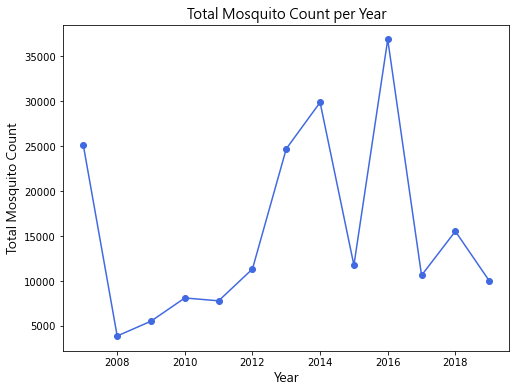

In [50]:
# Plotting a line graph:
plt.figure(figsize=(8,6))

# Calculating the total number of mosquitos captured for each year:
df.groupby(df['year'])['mosquito_count'].sum().plot(color='royalblue', marker='o') 

# Adding labels and titles:
plt.ylabel('Total Mosquito Count', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 13})
plt.xlabel ('Year', fontdict = {'fontname': 'Microsoft JhengHei', 'fontsize' : 13})
plt.title('Total Mosquito Count per Year', 
          fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 14})

plt.show()

***Observations***:

* There was a significant decrease in the amount of mosquitos captured from 2007 to 2008. 
</b>


* 2016 had the largest number of mosquitos captured followed by a sharp decrease in mosquito counts in 2017. 
</b>


* The overall trend starting in 2012 to 2019 appears to be oscillating between high mosquito counts and low mosquito counts for each subsequent year. 

Now let's look at the total number of mosquitos captured for each month, aggregated over all the years. 

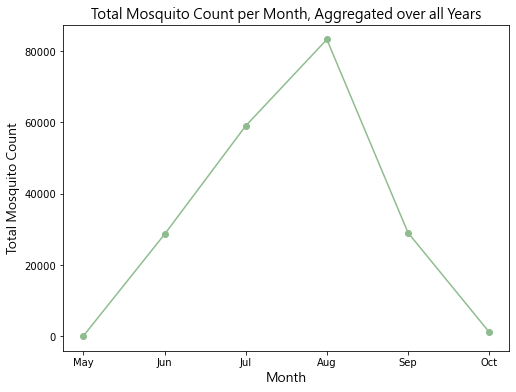

In [51]:
# Plotting a line graph:
plt.figure(figsize=(8, 6))

# Calculating the total number of mosquitos captured for each month:
df.groupby(df['month'])['mosquito_count'].sum().plot(color='darkseagreen', marker = 'o')

# Adding the labels and titles:
plt.ylabel('Total Mosquito Count', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 13})
plt.xlabel('Month', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 13})
plt.title('Total Mosquito Count per Month, Aggregated over all Years',
          fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 14})

# Setting custom tick labels for the x-axis:
month_names = ['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
plt.xticks(range(5, 11), month_names)

plt.show()

***Observations***:

* The total number of mosquitos caught increases for each month starting in May, peaks in August, with a sharp decline in September, followed by a slower decrease to October. 
</b>


* This trend can be explained by the fact that mosquitos are most prevalent in the summer months. 

Now let's look at the total number of mosquitos captured for each week, aggregated over all the years. 

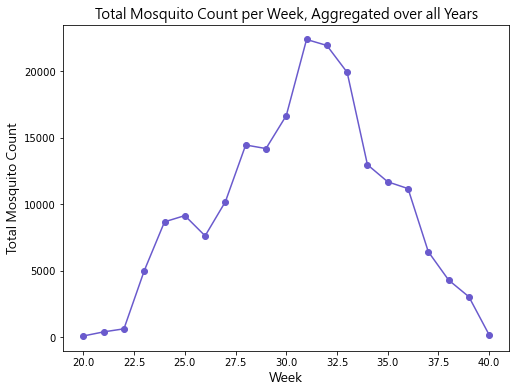

In [52]:
# Plotting a line graph:
plt.figure(figsize=(8,6))

# Calculating the total number of mosquitos captured for each week:
df.groupby(df['week'])['mosquito_count'].sum().plot(color='slateblue', marker = 'o')

# Adding labels and titles:
plt.ylabel('Total Mosquito Count', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 13})
plt.xlabel ('Week', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 13})
plt.title('Total Mosquito Count per Week, Aggregated over all Years', 
          fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 14})

plt.show()

***Observations***:

* There is a steady increase in the number of mosquitos caught, with a few small dips, between weeks 20 and 31.
</b>


* The graph peaks at weeks 31 and 32 and then has a steady sharp decrease to week 40. 
</b>


* This trend can be explained by the same reason for the month trend: mosquitos are more prevalent in the summer months. 

Another analysis we can perform is to compare the total number of mosquitos captured, per month, for the last 4 years.

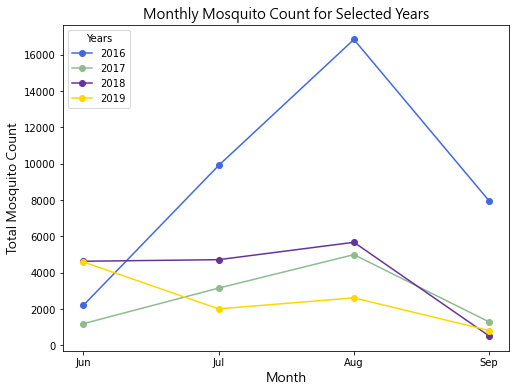

In [53]:
# Grouping by year and month, and then calculating the total mosquito count for each group:
result = df.groupby(['year', 'month'])['mosquito_count'].sum().reset_index(name='total_mosquito_count')

# Filtering for specific years (2016, 2017, 2018, 2019):
selected_years = [2016, 2017, 2018, 2019]
result_filtered = result[result['year'].isin(selected_years)]

# Pivot the DataFrame to have years as columns:
result_pivot = result_filtered.pivot_table(index='month', columns='year', values='total_mosquito_count')

# Plotting:
fig, ax = plt.subplots(figsize=(8, 6))

result_pivot.plot(ax=ax, marker='o', color=['royalblue','darkseagreen', 'rebeccapurple', 'gold'])

# Adding labels and titles:
ax.set_xlabel('Month', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 13})
ax.set_ylabel('Total Mosquito Count',fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 13} )
ax.set_title('Monthly Mosquito Count for Selected Years', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 14})
ax.legend(title='Years', loc='upper left')

# Setting custom tick labels for the x-axis:
months=['Jun', 'Jul', 'Aug', 'Sep']
ax.set_xticks(result_pivot.index)
ax.set_xticklabels(months)

plt.grid(False)
plt.show()

***Observations***:

* Every year, excluding 2019, had peak numbers in the month of August.
</b>


* Both 2016 and 2017 follow the same trend over the months.
</b>


* 2016 had significantly higher mosquito counts for July, August and September, when compared to the three other years. 

Finally, we can explore the total number of mosquitos captured, per week, for the last 4 years.

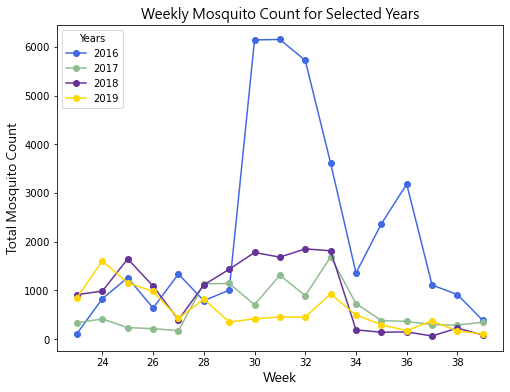

In [54]:
# Grouping by year and week, and then calculating the total mosquito count for each group:
result = df.groupby(['year', 'week'])['mosquito_count'].sum().reset_index(name='total_mosquito_count')

# Filtering for specific years (2016, 2017, 2018, 2019)
selected_years = [2016, 2017, 2018, 2019]
result_filtered = result[result['year'].isin(selected_years)]

# Pivot the DataFrame to have years as columns
result_pivot = result_filtered.pivot_table(index='week', columns='year', values='total_mosquito_count')

# Plotting:
fig, ax = plt.subplots(figsize=(8, 6))
result_pivot.plot(ax=ax, marker='o', color=['royalblue', 'darkseagreen', 'rebeccapurple', 'gold'])

# Adding labels and titles:
ax.set_xlabel('Week', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 13})
ax.set_ylabel('Total Mosquito Count', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 13})
ax.set_title('Weekly Mosquito Count for Selected Years', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 14})
ax.legend(title='Years', loc='upper left')

# Removing the grid:
plt.grid(False)

plt.show()

***Observations***:

* 2016 had a significant increase in mosquito count between weeks 29 and 32.
</b>


* 2016 also had a significant decrease in mosquito count from week 32 to week 34, with a small uptick at week 36, followed by another slow, but steady, decrease to week 40. 
</b>


* Every year, excluding 2019, has the same trend: an increase starting at week 27, peaking at weeks 30 to 34, and falling back down from weeks 34 to 40.

### Part 3 - Advanced EDA 
#### Question 1:<span style="font-size:14px; font-weight:normal;"> ***Mosquito Species and WNV Prevelance***</span>


A great visual to use for exploring the relationship between mosquito species and WNV prevalence is a bar chart depicting the portion of positive WNV test results for each species. 

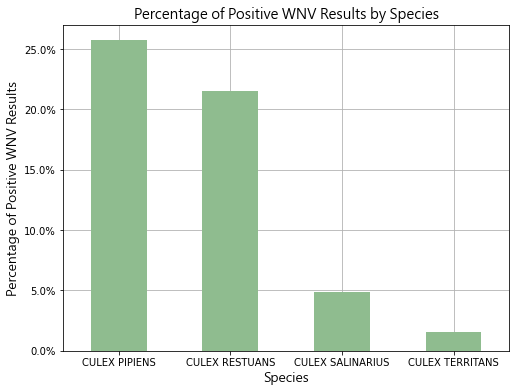

In [55]:
# Creating a copy of my dataframe:
df_copy = df.copy(deep=True)

# Creating a function to format y-axis labels as percentages:
def percentage_formatter(x, pos):
    return f'{x:.1f}%'

# Converting 'wnv_present' column to numerical values (assuming 'positive' means 1, 'negative' means 0)
df_copy['wnv_present'] = df_copy['wnv_present'].map({'positive': 1, 'negative': 0})

# Calculating the percentage of positive WNV results for each species:
percentage_positive = df_copy.groupby('species')['wnv_present'].sum() / df_copy.groupby('species')['wnv_present'].count() * 100

# Plotting:
plt.figure(figsize=(8, 6))
percentage_positive.plot(kind='bar', color='darkseagreen', zorder=2)

# Adding labels and titles:
plt.ylabel('Percentage of Positive WNV Results', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 13})
plt.xlabel('Species', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 13})
plt.title('Percentage of Positive WNV Results by Species', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize' : 14})

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Rotating x-axis ticks by 360 degrees:
plt.xticks(rotation=360)

# Setting zorder for grid lines:
plt.grid(zorder=1)
plt.show()

***Observations***:

* The *Culex Pipiens* and *Culex Restuans* species have approximately a 26% and 22% chance, respectively, of carrying WNV (West Nile Virus). 
</b>


* The *Culex Territans* species has approximately a 1% chance of carrying WNV. 
</b>


* The fact that the *Culex Restuans* and *Culex Pipiens* mosquito species make up 94% of the mosquitos in the dataset might explain why both species have a much higher rate of WNV when compared to *Culex Territans* and *Culex Salinarius*. 
</b>


* It is also interesting to note that the *Culex Restuans* species have more than double the count of mosquitos when compared to the *Culex Pipiens* species, but both species have almost equal rates of WNV. 

#### Question 2:  <span style="font-size:14px; font-weight:normal;"> ***Number of Mosquitos Caught by Trap Type*** </span>

With this type of data, a pie chart would be a good choice for a visual.

Let us take a peak at the data (the total number of mosquitos caught per trap)
we will be plotting.

In [56]:
df['trap_type'].value_counts(normalize = True)

GRAVID      0.959232
CDC         0.029413
SENTINEL    0.011300
OVI         0.000054
Name: trap_type, dtype: float64

We see that the *Ovi* trap type has only caught 1 mosquito from the years 2007 to 2019. Therefore, we make the decision to not include the *Ovi* trap type in our pie chart. 

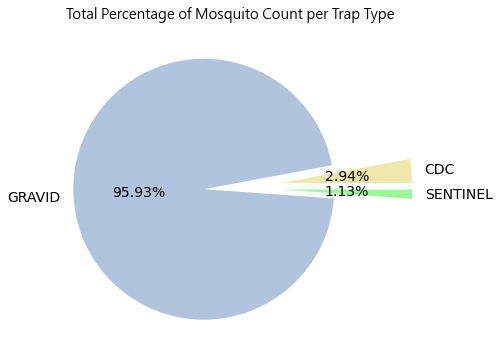

In [57]:
# Filtering rows where 'mosquito_count' is greater than or equal to 0:
df_filtered=df[df['mosquito_count']>=0]

# Setting our figure size:
plt.figure(figsize=(8,6))

# Counting occurrences for each 'trap_type':
cdc = df_filtered.loc[df_filtered['trap_type']=='CDC'].shape[0]
gravid = df_filtered.loc[df_filtered['trap_type']=='GRAVID'].shape[0]
senti = df_filtered.loc[df_filtered['trap_type']=='SENTINEL'].shape[0]

# Adding weights and labels:
weights = [cdc, gravid, senti]
labels = ['CDC', 'GRAVID', 'SENTINEL']
colors = ['palegoldenrod','lightsteelblue','palegreen']
explode = [0.4, 0.2, 0.4]

# Plotting the pie chart:
plt.pie(weights, labels=labels, colors=colors, explode=explode, autopct='%.2f%%',
        textprops={'fontsize': 14}, pctdistance=0.5)

# Adding title:
plt.title('Total Percentage of Mosquito Count per Trap Type', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 14})

plt.show()

***Observations***: 

* The *Gravid* trap type was responsible for capturing 96% of all the mosquitos caught. 

Another great visual for exploring the relationship between the number of mosquitos caught and trap type is a box plot. Again, we will be excluding the *Ovi* trap type. 

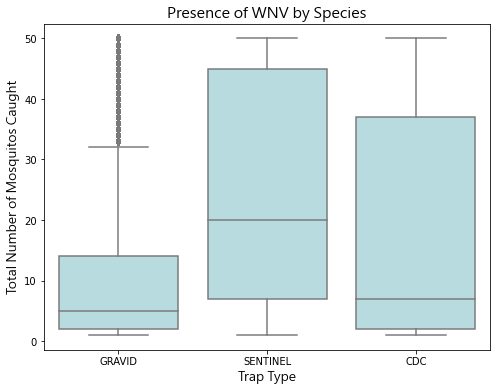

In [58]:
# Excluding rows with 'OVI' trap type:
filtered_df = df[df['trap_type'] != 'OVI']

# Creating the boxplot:
plt.figure(figsize=(8, 6))
sns.boxplot(x='trap_type', y='mosquito_count', data=filtered_df, color='powderblue')

# Adding labels and titles:
plt.title('Presence of WNV by Species', 
          fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 15})
plt.xlabel('Trap Type', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 13})
plt.ylabel('Total Number of Mosquitos Caught', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 13})

# Removing the grid:
plt.grid(False)

plt.show()

***Observations***:  

* The *Sentinel* trap type has the highest average count of mosquitos caught.
</b> 


* The *Gravid* trap type has the lowest average count of mosquitos caught and also has many outliers.
</b>


* The *Sentinel* and *CDC* trap types have no outliers. 

#### Question 3:  <span style="font-size:14px; font-weight:normal;"> ***Additional Insights*** </span>

##### WNV Prevalence Throughout the Years

A great addition insight would be to explore the proportion of postive WNV tests vs negative WNV tests throughout the years. First we will create a stacked bar chart with the years on the *y-axis*, sorted from the year with the highest proportion of positive WNV tests to the year with the lowest proportion of positive WNV tests. Then we will create a bar chart, with the years in order, showing the percentage of positive WNV tests for each year.  

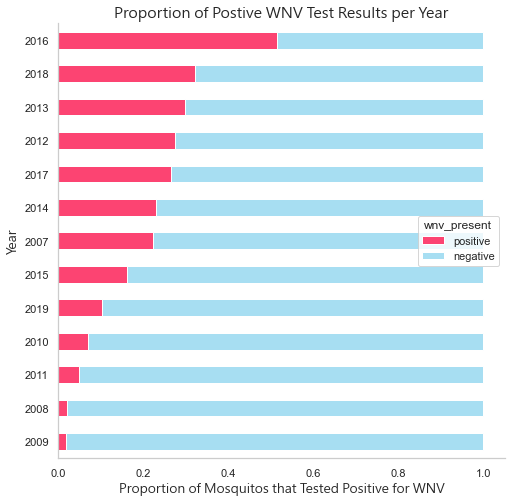

In [59]:
# Calculating the proportion of WNV presence:
perc_data = df.groupby(['year', 'wnv_present'])['wnv_present'].count() / df.groupby('year')['wnv_present'].count()

# Plotting:
sns.set(style="whitegrid")
my_colour=['#fc4472', '#a7def2']
perc_data.unstack()[['positive', 'negative']].sort_values('positive').plot(kind='barh',
                                                                         stacked=True, color=my_colour, figsize=(8, 8))
# Adding labels and titles:
plt.title("Proportion of Postive WNV Test Results per Year", fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 15})
plt.xlabel('Proportion of Mosquitos that Tested Positive for WNV', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 13})
plt.ylabel('Year', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 13})

# Removing the top and right spines:
sns.despine()

# Removing the grids:
plt.grid(False)

plt.show()

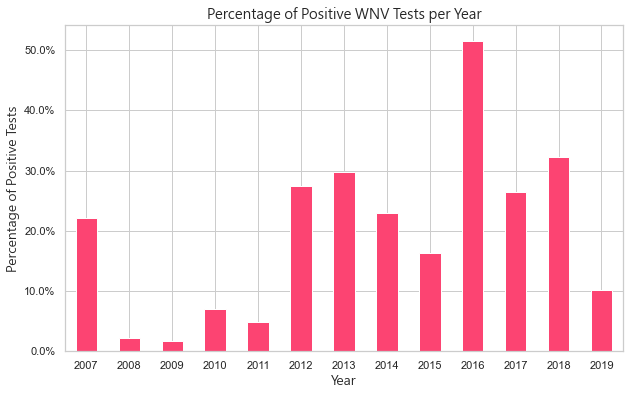

In [60]:
df_cop = df.copy(deep=True)

# Creating a function to format y-axis labels as percentages:
def percentage_formatter(x, pos):
    return f'{x:.1f}%'

# Converting 'wnv_present' column to numerical values (assuming 'positive' means 1, 'negative' means 0)
df_cop['wnv_present'] = df_cop['wnv_present'].map({'positive': 1, 'negative': 0})

# Calculating the percentage of positive WNV results for each species:
percentage_positive_1 = df_cop.groupby('year')['wnv_present'].sum() / df_cop.groupby('year')['wnv_present'].count() * 100

# Plotting:
plt.figure(figsize=(10, 6))
percentage_positive_1.plot(kind='bar', color='#fc4472')

plt.ylabel('Percentage of Positive Tests', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 13})
plt.xlabel('Year', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 13})
plt.title('Percentage of Positive WNV Tests per Year', fontdict={'fontname': 'Microsoft JhengHei', 'fontsize': 14})

plt.gca().yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

# Rotate x-axis ticks by 45 degrees
plt.xticks(rotation=360)

plt.show()

***Observations***:

* 2016 had the highest percentage of positive WNV tests. 
</b>


* The years 2016 and 2018 have the top two highest percentages associated with positive WNV tests and this coincides with the fact that both years also had the highest count of mosquitos captured.
</b>


* 2013 has the third highest percentage of positive WNV test but 2014 had the third highest mosquito count. 

### Summary

1. 22% of all the tests in the dataset have positive results for WNV.
</b>


2. The year 2016 had the highest count of mosquitos captured followed by the year 2014.
</b>


3. The month August had the highest count of mosquitos captured; May and October had the lowest count.
</b>


4. Weeks 30 to 32 had the highest count of mosquitos captures; weeks 20 and 40 had the loswest count. 
</b>


5. The addresses with the block number 100 were the areas most used for mosquito trappings. 
</b>


6. The *Gravid* trap type caught 95.93% of all mosquitos captured in the dataset. 
</b>


7. The year 2016 had the highest rate of postive WNV test followed by the year 2014. 
</b>


8. The *Culex Restuans* species makes up 64% of the mosquitos in the dataset and the *Culex Pipiens* mosquito species makes up 30%.  
</b>


9. The *Culex Pipiens* and *Culex Restuans* species have approximately 26% and 22% chance, respectively, of carrying WNV.
</b>


10. It is also interesting to note that the *Culex Restuans* species have more than double the count of mosquitos when compared to the *Culex Pipiens* species, but both species have almost equal rates of WNV. 